## E steban Limón Ochoa

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle  # Librería para hacer ciclos
import matplotlib.pyplot as plt
import scipy.stats as st     # Librería estadística
import pandas as pd

# <font color = red> Tarea
![imagen.png](attachment:imagen.png)
Además use el método de estratificación donde se divide en B estratos, visto la clase pasada y compare el resultado con los métodos anteriores cuando se toman $2,4,6,10$ estratos respectivamente, concluya.

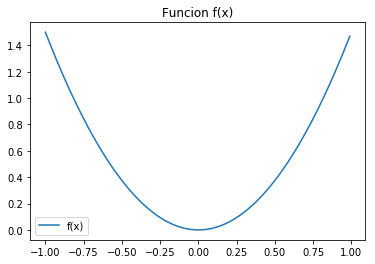

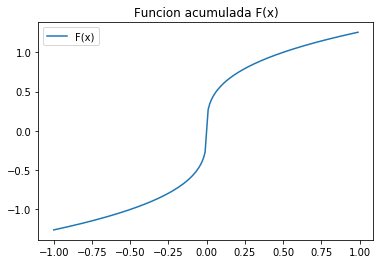

In [25]:
f=lambda x: (x**2)*3/2 if x<=1 and x>=-1 else 0
#np.cbrt=raiz cubica
F= lambda x: np.cbrt(x*2)#inversa de la integral


x=np.arange(-1,1,.01)


#graficamos para revisar si es monotona
plt.plot(x,list(map(f,x)),label='f(x)')
plt.legend()
plt.title('Funcion f(x)')
plt.show()
#graficamos la funcion inversa
plt.plot(x,list(map(F,x)),label='F(x)')
plt.title('Funcion acumulada F(x)')
plt.legend()
plt.show()

In [14]:
xi = lambda u: -(-2*u+1)**(1/3) if u<.5 else (2*u-1)**(1/3)
N=1000


# aproximar el valor de la integral usando montecarlo típico
#u1=np.concatenate(r)#usando misma muestra
u1 = np.random.rand(N)#grnerando la muestra
f_u1 = list(map(xi,u1))
media_montecarlo = np.mean(f_u1)
#se necsita usar la misma muestra


#aproximar por el montecarlo estratizado
r1 = np.random.uniform(0,0.6,3)
r2 = np.random.uniform(.6,.9,3)
r3 = np.random.uniform(.9,1,4)
r  = [r1,r2,r3]
m  = range(len(r))  # Cantidad de estratos
w  = [3/10/.6,3/10/.3,4/10/.1]
#xi = list(map(lambda r:-np.log(r),r))
x2=list(map(lambda r:np.array(list(map(xi,r))),r))
muestras = list(map(lambda wi,xi:xi/wi,w,x2))

mt_estrat=np.concatenate(muestras).mean()


# Aproximación usando método de los números complementarios
u2 = 1-u1
#f_u2 = list(map(f,u2))
f_u2 = list(map(xi,u2))
media_complementario = (np.mean(f_u2)+media_montecarlo)/2

print('Media usando montecarlo estándar     =',media_montecarlo)
print('Media usando montecarlo estratizado =',mt_estrat)
print('Media usando números complementarios =',media_complementario)

Media usando montecarlo estándar     = 0.02012604062061809
Media usando montecarlo estratizado = 0.15235621266159544
Media usando números complementarios = 0.0


In [46]:
N=1000
def mt_estrat(N:'Número de estratos'):
    '''Función que regresa variables aleatorias generadas en N reciones'''
    i = N
    u2 = np.random.rand(i)
    i2 = np.arange(0,i)
    vals = (u2+i2)/i
    return vals

In [62]:
#Muestreo estratificado
#estratos =numero de divisiones que tendra el espacio muestral [-1,1]
estr=[2,4,6,10]
#estr=[2,4,6,10,15,20,25,50]
muestras = list(map(mt_estrat,estr))
rdn = list(map(lambda m_i:list(map(lambda m:xi(m),m_i)),muestras))
mean_estratos = list(map(lambda ei:np.mean(ei),rdn))
# imprimo los resultados obtenidos para cada estrato
prtn = list(map(lambda bi,mean:print('Estimacíon de la media para %i estratos es %2.4f'
                         %(bi,mean)),estr,mean_estratos))
#Al agregar más estratos se hace una media cercana a cero, por lo que estariamos eliminando la variación.


Estimacíon de la media para 2 estratos es -0.1501
Estimacíon de la media para 4 estratos es 0.1474
Estimacíon de la media para 6 estratos es 0.0343
Estimacíon de la media para 10 estratos es -0.0157


El muestreo Monte Carlo complementario ayuda a la reducción de la varianza, ya que con esta se crean los complementos de los números de la muestra. Mientras que el Monte Carlo estratificado ajusta los números a una distribución con mayor uniformidad. Por lo que creo que tanto el muestreo estratificado y la generación de números complementarios ayudan a la reducción de varianza. Aunque al haber mayor uniformidad en el Monte Carlo estratificado, creo que es el método más confiable.